## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
from ydata_profiling import ProfileReport

/tmp/ipykernel_20/2874374446.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Data Exploration

In [2]:
df = pd.read_csv("/kaggle/input/programming-languages/QueryResults.csv",names=['DATE', 'TAG', 'POSTS'],header=0)

In [3]:
df.head()

DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124

In [4]:
df.tail()

DATE    TAG  POSTS
1986  2020-07-01 00:00:00      r   5694
1987  2020-07-01 00:00:00     go    743
1988  2020-07-01 00:00:00   ruby    775
1989  2020-07-01 00:00:00   perl    182
1990  2020-07-01 00:00:00  swift   3607

In [5]:
df.shape

(1991, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    1991 non-null   object
 1   TAG     1991 non-null   object
 2   POSTS   1991 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 46.8+ KB


In [7]:
df.describe().T

count         mean          std  min    25%     50%     75%      max
POSTS  1991.0  5069.401306  6065.055196  1.0  426.5  2472.0  8163.0  34478.0

In [8]:
df.dtypes

DATE     object
TAG      object
POSTS     int64
dtype: object

In [9]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

 Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [10]:
df.groupby('TAG').sum()

DATE    POSTS
TAG                                                                   
assembly    2008-08-01 00:00:002008-09-01 00:00:002008-10-...    34852
c           2008-08-01 00:00:002008-09-01 00:00:002008-10-...   336042
c#          2008-07-01 00:00:002008-08-01 00:00:002008-09-...  1423530
c++         2008-08-01 00:00:002008-09-01 00:00:002008-10-...   684210
delphi      2008-08-01 00:00:002008-09-01 00:00:002008-10-...    46212
go          2009-11-01 00:00:002009-12-01 00:00:002010-01-...    47499
java        2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1696403
javascript  2008-08-01 00:00:002008-09-01 00:00:002008-10-...  2056510
perl        2008-08-01 00:00:002008-09-01 00:00:002008-10-...    65286
php         2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1361988
python      2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1496210
r           2008-09-01 00:00:002008-11-01 00:00:002008-12-...   356799
ruby        2008-08-01 00:00:002008-09-01 00:00:002008-10-...   214582
swift       2009-01-01 00:00:002009-02-01 00:00:002009-03-...   273055

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

How many months of data exist per language? Which language had the fewest months with an entry? 


In [11]:
df.groupby('TAG').count()

DATE  POSTS
TAG                    
assembly     144    144
c            144    144
c#           145    145
c++          144    144
delphi       144    144
go           129    129
java         144    144
javascript   144    144
perl         144    144
php          144    144
python       144    144
r            142    142
ruby         144    144
swift        135    135

In [12]:
df.isna().sum()

DATE     0
TAG      0
POSTS    0
dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [13]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [14]:
df.DATE[1]

'2008-08-01 00:00:00'

In [15]:
df.DATE=pd.to_datetime(df['DATE'])
df.head()

DATE         TAG  POSTS
0 2008-07-01          c#      3
1 2008-08-01    assembly      8
2 2008-08-01  javascript    162
3 2008-08-01           c     85
4 2008-08-01      python    124

## Data Manipulation



In [16]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG         assembly       c       c#     c++  delphi     go     java  \
DATE                                                                    
2008-07-01       NaN     NaN      3.0     NaN     NaN    NaN      NaN   
2008-08-01       8.0    85.0    511.0   164.0    14.0    NaN    222.0   
2008-09-01      28.0   321.0   1649.0   755.0   105.0    NaN   1137.0   
2008-10-01      15.0   303.0   1989.0   811.0   112.0    NaN   1153.0   
2008-11-01      17.0   259.0   1730.0   735.0   141.0    NaN    958.0   
...              ...     ...      ...     ...     ...    ...      ...   
2020-03-01     317.0  2670.0   8954.0  5107.0   181.0  719.0  13253.0   
2020-04-01     406.0  3472.0  10042.0  6820.0   250.0  887.0  15377.0   
2020-05-01     386.0  3602.0   9923.0  7063.0   221.0  826.0  14711.0   
2020-06-01     363.0  2757.0   9064.0  6161.0   214.0  765.0  13015.0   
2020-07-01     298.0  2294.0   9145.0  5756.0   212.0  743.0  12723.0   

TAG         javascript   perl     php   python       r   ruby   swift  
DATE                                                                   
2008-07-01         NaN    NaN     NaN      NaN     NaN    NaN     NaN  
2008-08-01       162.0   28.0   161.0    124.0     NaN   73.0     NaN  
2008-09-01       640.0  131.0   482.0    542.0     6.0  290.0     NaN  
2008-10-01       725.0  127.0   617.0    510.0     NaN  249.0     NaN  
2008-11-01       579.0   97.0   504.0    452.0     1.0  160.0     NaN  
...                ...    ...     ...      ...     ...    ...     ...  
2020-03-01     20483.0  215.0  6672.0  26673.0  5761.0  780.0  3434.0  
2020-04-01     24634.0  240.0  8060.0  32605.0  7047.0  860.0  4015.0  
2020-05-01     25196.0  228.0  7917.0  34478.0  6833.0  774.0  4066.0  
2020-06-01     23360.0  203.0  7188.0  31817.0  6249.0  670.0  3733.0  
2020-07-01     23802.0  182.0  7334.0  31261.0  5694.0  775.0  3607.0  

[145 rows x 14 columns]

What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [17]:
reshaped_df.shape

(145, 14)

In [18]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [19]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

Count the number of entries per programming language. Why might the number of entries be different? 

In [20]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [21]:
reshaped_df.fillna(0,inplace=True)

In [22]:
reshaped_df.isna().values.any()

False

## Data Visualisaton


In [23]:
profile=ProfileReport(reshaped_df,title='Profile Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

*Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

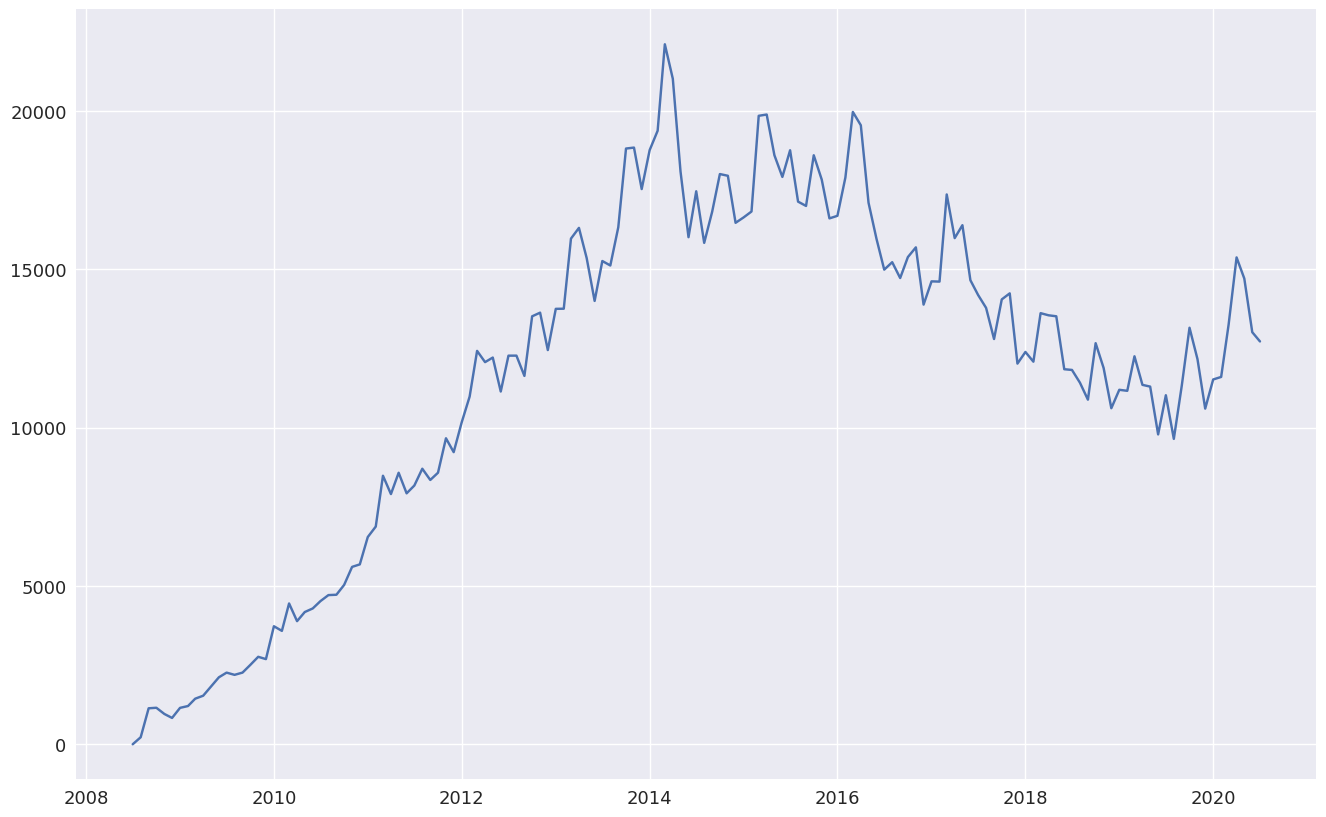

In [24]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(reshaped_df.index,reshaped_df['java'])

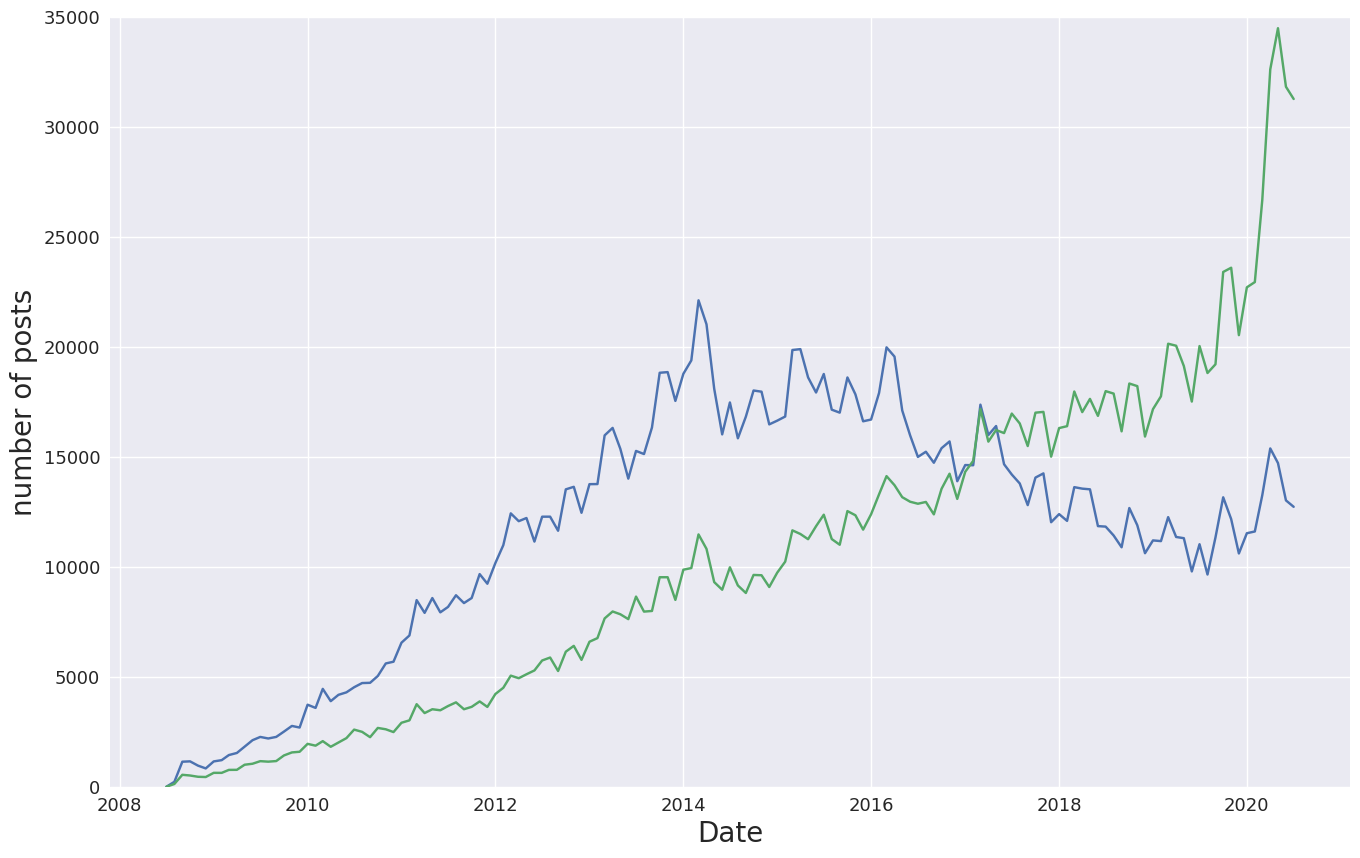

In [25]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Date',fontsize=20)
plt.ylabel('number of posts',fontsize=20)
plt.ylim(0,35000)
plt.plot(reshaped_df.index,reshaped_df['java'])
plt.plot(reshaped_df.index,reshaped_df['python'])

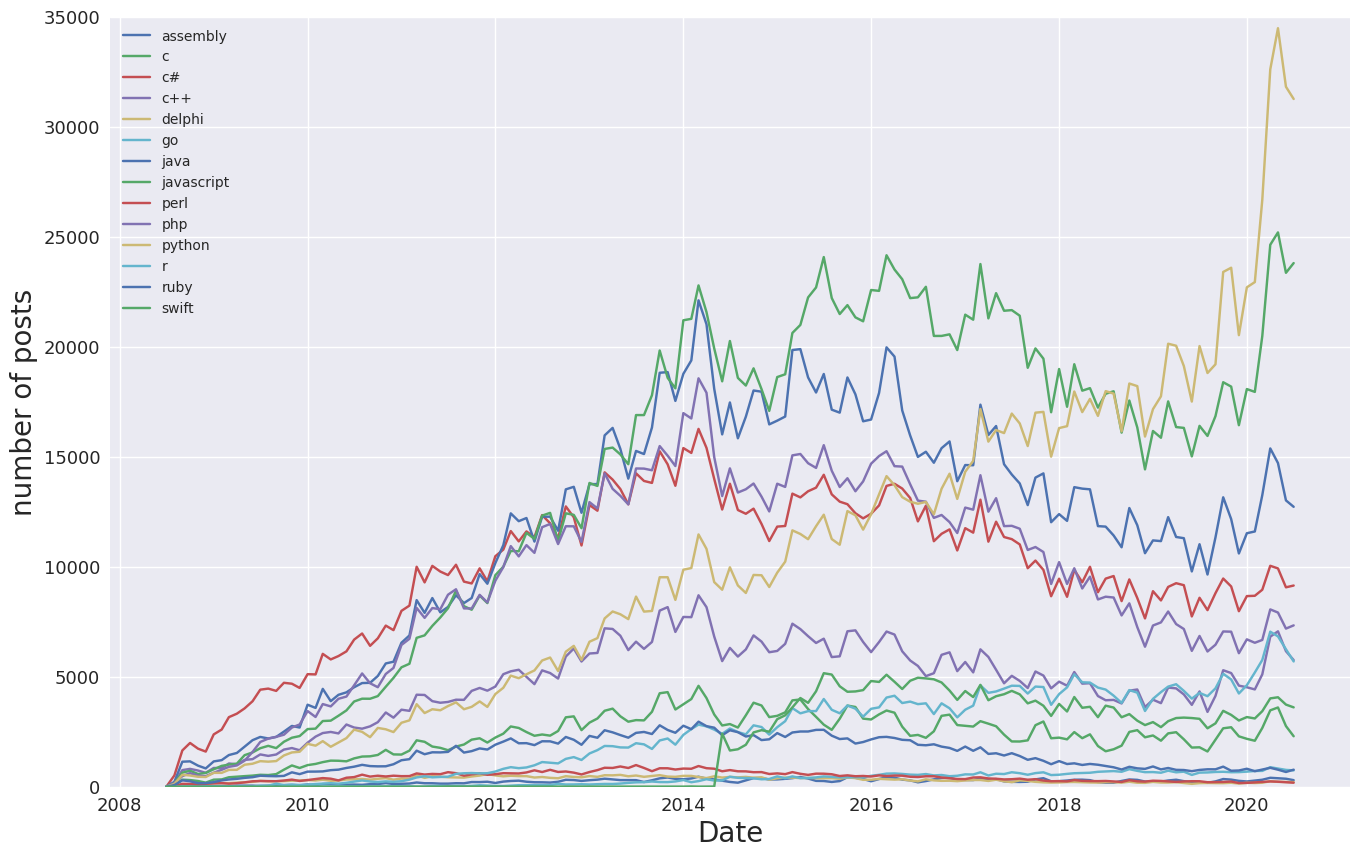

In [26]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Date',fontsize=20)
plt.ylabel('number of posts',fontsize=20)
plt.ylim(0,35000)
for col in reshaped_df.columns:
    plt.plot(reshaped_df.index,reshaped_df[col],label=reshaped_df[col].name)
plt.legend()
plt.show()

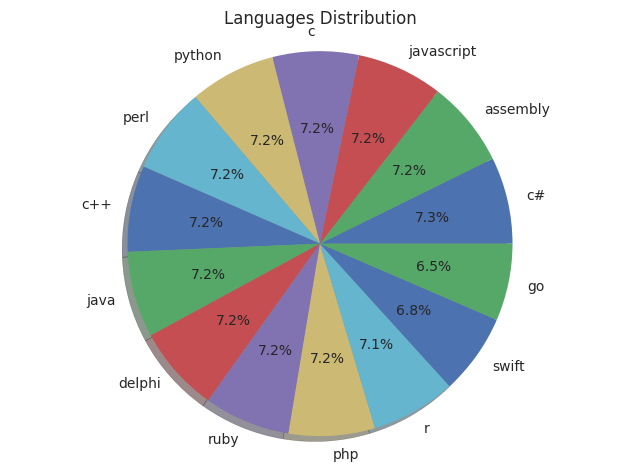

In [27]:
tag_counts = df['TAG'].value_counts()
plt.pie(tag_counts.values, autopct='%1.1f%%', labels=tag_counts.index, shadow=True)
plt.axis('equal')
plt.title('Languages Distribution')
plt.show()

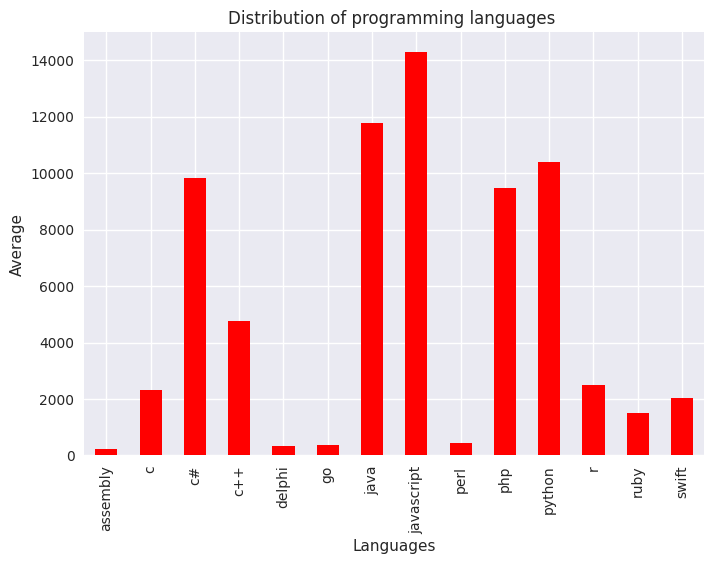

In [28]:
count = df.groupby('TAG')['POSTS'].mean()
count.plot(kind='bar',color='red')
plt.xlabel('Languages')
plt.ylabel('Average')
plt.title('Distribution of programming languages ')
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

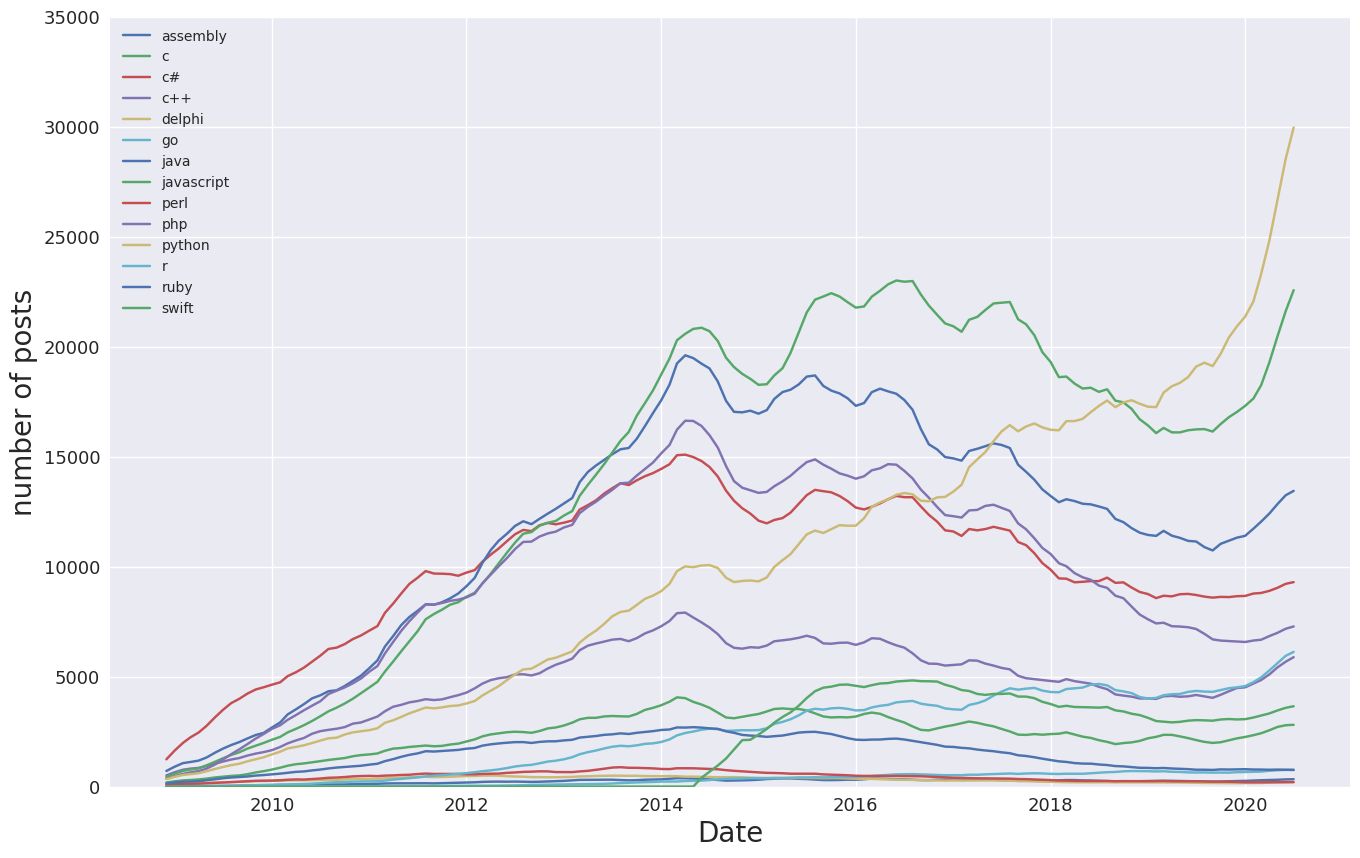

In [29]:
roll_df=reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Date',fontsize=20)
plt.ylabel('number of posts',fontsize=20)
plt.ylim(0,35000)
for col in roll_df.columns:
    plt.plot(roll_df.index,roll_df[col],label=roll_df[col].name)
plt.legend()
plt.show()